## CA 1, LLMs Spring 2024

- **Name: Sina**
- **Student ID: 810199554**

---
### This is due on **April 2nd, 2024**, submitted via [elearn](https://elearn.ut.ac.ir/).
#### Your submission should be named using the following format: `CA1_LASTNAME_STUDENTID.ipynb`.

### **IMPORTANT**: After copying this notebook to your Google Drive, please paste a link to it below. To get a publicly-accessible link, hit the *Share* button at the top right, then click "Get shareable link" and copy over the result. If you fail to do this, you will receive no credit for this homework!
# ***LINK: *https://colab.research.google.com/drive/1iTea6cj16jipsjUHRrJJOHSbcyRP8Q_G?usp=sharing****

---

##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `YOUR CODE HERE`.

- For text-based answers, you should replace the text that says "Write your answer here..." with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

If you have any further questions or concerns, contact the TA via email:
namazifard@ut.ac.ir

---

# Part 1: Word Embeddings and Masked LMs (40 points)

### Question 1.1 (5 points)

In this part, we will start with `GloVe` [(Pennington et al.)](https://aclanthology.org/D14-1162.pdf) word embeddings. `GloVe` provides low-dimensional dense vectors representing words' semantics. The distance between `GloVe` embeddings captures the semantic relationships of words. We are using the `Gensim` library for  working with `GloVe` embeddings. Let's install `Gensim` and download the 6B token model. Also, we should unzip the model file. Running the cell below could take a few minutes.

In [4]:
!pip install gensim
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip "/content/glove.6B.zip"

--2024-04-02 19:34:46--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-04-02 19:34:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2024-04-02 19:37:25 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
 

We are using the model file with 6 billion tokens containing 200-dimensional vectors. Running the cell below will create the word embedding model.

In [5]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file = 'glove.6B.200d.txt'
model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)

Try to write the 5 most similar words to **computer**, **football**, **ocean**, **music**, and **artificial** along with their similarity scores.

In [6]:
words = ['computer', 'football', 'ocean', 'music', 'artificial']
similar_words = {}

for word in words:
    most_similar = model.most_similar(word, topn=5)
    similar_words[word] = most_similar

for word, similar_list in similar_words.items():
    print(f"Similar words to '{word}':")
    for similar_word, similarity_score in similar_list:
        print(f"- {similar_word}: {similarity_score:.4f}")
    print()

Similar words to 'computer':
- computers: 0.8358
- software: 0.7828
- technology: 0.6908
- pc: 0.6648
- systems: 0.6584

Similar words to 'football':
- soccer: 0.8105
- basketball: 0.7896
- league: 0.7167
- baseball: 0.7023
- rugby: 0.7007

Similar words to 'ocean':
- sea: 0.7277
- waters: 0.7242
- coast: 0.6973
- atlantic: 0.6918
- seas: 0.6812

Similar words to 'music':
- musical: 0.7339
- songs: 0.7254
- pop: 0.6906
- musicians: 0.6877
- recording: 0.6849

Similar words to 'artificial':
- natural: 0.5051
- insemination: 0.4972
- man-made: 0.4853
- synthetic: 0.4770
- creating: 0.4710



**Analogy** in word embeddings refers to performing algebraic operations on vectors to capture the most similar words to the resulting embedding. One of the most famous examples is the analogy *king - man + woman = queen*. In `Gensim`, we can apply analogies using the `most_similar` function. The `positive` argument receives a list of words and applies addition between their embeddings, while the `negative` argument receives a list of words to subtract their embeddings from the result. In our example, *king* and *woman* are in the positive list, while *man* is in the negative list.

Let's explore more analogies and the power of `GloVe` embeddings. Write down five other analogies.

In [7]:
analogies = [["human", "alive", "mobile"],
             ["cactus", "plant", "lion"],
             ["scientist", "laboratory", "farmer"],
             ["guitar", "instrument", "singer"],
             ["flower", "vase", "book"]]
similar_words = {}

for words in analogies:
    most_similar = model.most_similar(positive=[words[0], words[1]], negative=[words[2]], topn=5)
    similar_words[words[0]] = most_similar

for words in analogies:
    similar_list = similar_words[words[0]]
    print(f"Similar words for analogy '{words[0]} - {words[1]} + {words[2]}':")
    for similar_word, similarity_score in similar_list:
        print(f"- {similar_word}: {similarity_score:.4f}")
    print()

Similar words for analogy 'human - alive + mobile':
- beings: 0.5301
- dying: 0.5288
- dead: 0.5267
- animals: 0.4832
- humanity: 0.4830

Similar words for analogy 'cactus - plant + lion':
- plants: 0.6084
- cacti: 0.5691
- shrubs: 0.5165
- flowering: 0.5147
- herbaceous: 0.4915

Similar words for analogy 'scientist - laboratory + farmer':
- lab: 0.7137
- scientists: 0.6158
- research: 0.6020
- researcher: 0.5808
- physics: 0.5768

Similar words for analogy 'guitar - instrument + singer':
- instruments: 0.7038
- percussion: 0.6244
- guitars: 0.5834
- keyboard: 0.5789
- strings: 0.5565

Similar words for analogy 'flower - vase + book':
- vases: 0.6047
- petals: 0.5271
- flowers: 0.4950
- hibiscus: 0.4846
- blossoms: 0.4764



### Question 1.2 (10 points)
Let's visualize embeddings! We'll start with the following list of words. Extract the embedding for each word and reduce their dimensionality to 2 using the `t-SNE` [(Van der Maaten et al.)](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) algorithm. Then, plot them on a scatter plot with their labels.

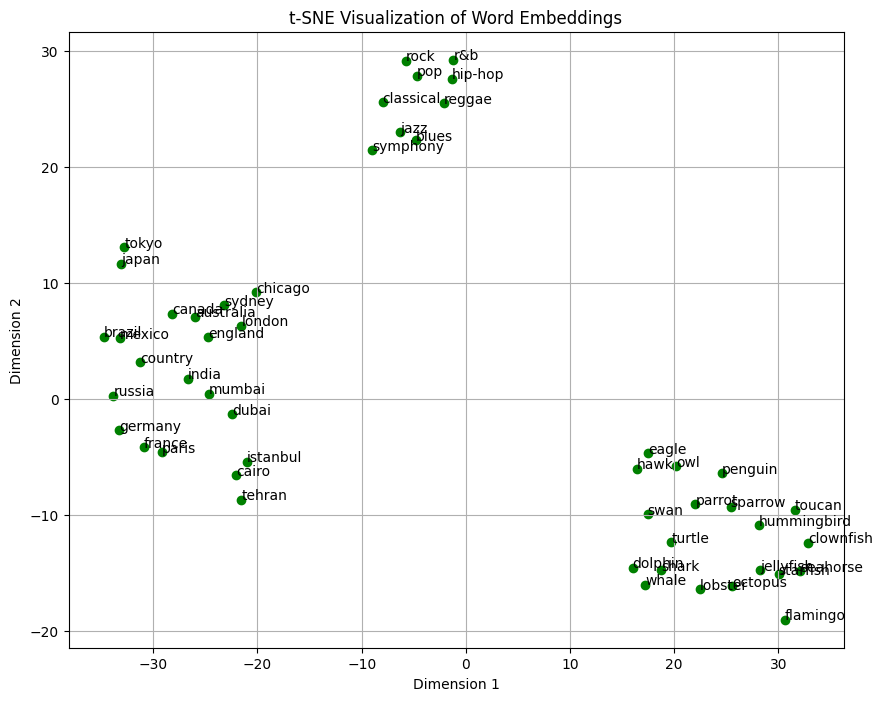

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

words = [
    "dolphin", "shark", "octopus", "jellyfish", "seahorse",
    "turtle", "clownfish", "lobster", "starfish", "whale",
    "eagle", "sparrow", "owl", "hummingbird", "penguin",
    "toucan", "flamingo", "hawk", "parrot", "swan",
    "england", "brazil", "japan", "australia", "india",
    "germany", "canada", "france", "mexico", "russia",
    "chicago", "paris", "tokyo", "london", "sydney",
    "istanbul", "tehran", "cairo", "dubai", "mumbai",
    "symphony", "jazz", "rock", "blues", "reggae",
    "hip-hop", "country", "pop", "classical", "r&b"
]

embeddings = np.array([model.get_vector(word) for word in words])

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='g')

for i, word in enumerate(words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

Analyze the plot and clusters of embeddings in a few sentences.

As observed in the plot, the embeddings are grouped into three clusters:

The cluster positioned in the middle and above is associated with `Music Genre`, wherein embeddings such as rock, pop, classical, and jazz, sharing similar features, are grouped together.


 Similarly, embeddings related to `Countries` are clustered towards the left-middle of the scatter plot, while those associated with `Animals` are clustered towards the right-down side.

  The plot illustrates that embeddings with similar features are grouped together within a cluster. Furthermore, based on the distinct features of clusters, they are positioned within different ranges on the scatter plot.

### Question 1.3 (15 points)
Find the most similar words to **bat** and **charge** in GloVe.

In [9]:
words = ['bat', 'charge']

similar_words = {}
for word in words:
    most_similar = model.most_similar(word, topn=5)
    similar_words[word] = most_similar

for word, similar_list in similar_words.items():
    print(f"Similar words to '{word}':")
    for similar_word, similarity_score in similar_list:
        print(f"- {similar_word}: {similarity_score:.4f}")
    print()

Similar words to 'bat':
- bats: 0.6917
- batting: 0.6161
- balls: 0.5693
- batted: 0.5531
- toss: 0.5506

Similar words to 'charge':
- charges: 0.8177
- charged: 0.8067
- charging: 0.6607
- guilty: 0.6375
- accused: 0.6240



Now, consider these sentences:
* *The **bat** flew swiftly through the air.*
* *He grabbed his **bat** and headed to the baseball field.*

Or these sentences:
* *I need to **charge** my phone before leaving.*
* *He was arrested for **charge** of theft.*

As you can see, a static vector cannot capture the meaning of a word in every context, and some words have very different meanings in different sentences. In this part, we will work with a masked language model, which captures contextual embeddings. Let's import necessary modules and load the `BERT` [(Devlin et al.)](https://aclanthology.org/N19-1423.pdf) model.

In [10]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The cell below demonstrates how to input data into the `BERT` model and how to capture word embeddings from each layer.

In [11]:
test_input = "This is a test"
test_encodings = tokenizer(test_input, return_tensors='pt')
output = model(**test_encodings)
print("Num. of BERT layers:", len(output[-1]))
print("Dimensionality of each layer output (batch_size * num_tokens * embedding_dim): ", output[-1][0].size())

Num. of BERT layers: 13
Dimensionality of each layer output (batch_size * num_tokens * embedding_dim):  torch.Size([1, 6, 768])


In this part, you should analyze the embeddings of the word **bat** in the output of each layer of the `BERT` model for the provided sentences. First, identify the location of the **bat** embedding within the output of each layer for both sentences. Next, calculate the `cosine similarity` between the **bat** embeddings for each layer. Finally, examine the similarity levels of the **bat** embeddings between the two sentences across the various layers of the `BERT` model.

In [12]:
import torch
import torch.nn.functional as F
from transformers import BertModel, BertTokenizer


sentences = [
    "The bat flew swiftly through the air.",
    "He grabbed his bat and headed to the baseball field."
]

encoded_sentences = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)


output = model(**encoded_sentences)

word_index = tokenizer.convert_tokens_to_ids('bat')

previous_layer_output1 = None
previous_layer_output2 = None

for layer_index, layer_output in enumerate(output['hidden_states']):
    print(f"Layer {layer_index + 1}:")

    bat_embedding1 = None
    bat_embedding2 = None

    for i, token_id in enumerate(encoded_sentences['input_ids'][0]):
        if token_id == word_index:
            bat_embedding1 = layer_output[0][i]
            print(f"    Sentence 1, Token {i}")

    for i, token_id in enumerate(encoded_sentences['input_ids'][1]):
        if token_id == word_index:
            bat_embedding2 = layer_output[0][i]
            print(f"    Sentence 2, Token {i}")

    if bat_embedding1 is not None and bat_embedding2 is not None:
        bat_embedding1 = bat_embedding1.reshape(1, -1)
        bat_embedding2 = bat_embedding2.reshape(1, -1)

        if layer_index > 0:
            similarity_within_sentence1 = F.cosine_similarity(bat_embedding1, previous_layer_output1)
            similarity_within_sentence2 = F.cosine_similarity(bat_embedding2, previous_layer_output2)
            print(f"    Sentence 1, Consecutive Cosine Similarity with Previous Layer: {similarity_within_sentence1.item():.6f}")
            print(f"    Sentence 2, Consecutive Cosine Similarity with Previous Layer: {similarity_within_sentence2.item():.6f}")

        similarity_between_sentences = F.cosine_similarity(bat_embedding1, bat_embedding2)
        print(f"    Cosine Similarity between Sentences (Layer {layer_index + 1}): {1-similarity_between_sentences.item():.6f}")

    previous_layer_output1 = bat_embedding1
    previous_layer_output2 = bat_embedding2


Layer 1:
    Sentence 1, Token 2
    Sentence 2, Token 4
    Cosine Similarity between Sentences (Layer 1): 0.978527
Layer 2:
    Sentence 1, Token 2
    Sentence 2, Token 4
    Sentence 1, Consecutive Cosine Similarity with Previous Layer: 0.862175
    Sentence 2, Consecutive Cosine Similarity with Previous Layer: 0.795102
    Cosine Similarity between Sentences (Layer 2): 0.878408
Layer 3:
    Sentence 1, Token 2
    Sentence 2, Token 4
    Sentence 1, Consecutive Cosine Similarity with Previous Layer: 0.912909
    Sentence 2, Consecutive Cosine Similarity with Previous Layer: 0.901285
    Cosine Similarity between Sentences (Layer 3): 0.880398
Layer 4:
    Sentence 1, Token 2
    Sentence 2, Token 4
    Sentence 1, Consecutive Cosine Similarity with Previous Layer: 0.928193
    Sentence 2, Consecutive Cosine Similarity with Previous Layer: 0.910643
    Cosine Similarity between Sentences (Layer 4): 0.863176
Layer 5:
    Sentence 1, Token 2
    Sentence 2, Token 4
    Sentence 1, Con

Do the same for **charge** provided sentences.

In [13]:
import torch
import torch.nn.functional as F
from transformers import BertModel, BertTokenizer

sentences = [
    "I need to charge my phone before leaving.",
    "He was arrested for charge of theft."
]

encoded_sentences = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)

with torch.no_grad():
    output = model(**encoded_sentences)

word_index = tokenizer.convert_tokens_to_ids('charge')

previous_layer_output1 = None
previous_layer_output2 = None

for layer_index, layer_output in enumerate(output['hidden_states']):
    print(f"Layer {layer_index + 1}:")

    charge_embedding1 = None
    charge_embedding2 = None

    for i, token_id in enumerate(encoded_sentences['input_ids'][0]):
        if token_id == word_index:
            charge_embedding1 = layer_output[0][i]
            print(f"    Sentence 1, Token {i}")

    for i, token_id in enumerate(encoded_sentences['input_ids'][1]):
        if token_id == word_index:
            charge_embedding2 = layer_output[0][i]
            print(f"    Sentence 2, Token {i}")

    if charge_embedding1 is not None and charge_embedding2 is not None:
        charge_embedding1 = charge_embedding1.reshape(1, -1)
        charge_embedding2 = charge_embedding2.reshape(1, -1)

        if layer_index > 0:
            similarity_within_sentence1 = F.cosine_similarity(charge_embedding1, previous_layer_output1)
            similarity_within_sentence2 = F.cosine_similarity(charge_embedding2, previous_layer_output2)
            print(f"    Sentence 1, Consecutive Cosine Similarity with Previous Layer: {similarity_within_sentence1.item():.6f}")
            print(f"    Sentence 2, Consecutive Cosine Similarity with Previous Layer: {similarity_within_sentence2.item():.6f}")

        similarity_between_sentences = F.cosine_similarity(charge_embedding1, charge_embedding2)
        print(f"    Cosine Similarity between Sentences (Layer {layer_index + 1}): {1-similarity_between_sentences.item():.6f}")

    previous_layer_output1 = charge_embedding1
    previous_layer_output2 = charge_embedding2


Layer 1:
    Sentence 1, Token 4
    Sentence 2, Token 5
    Cosine Similarity between Sentences (Layer 1): 0.945070
Layer 2:
    Sentence 1, Token 4
    Sentence 2, Token 5
    Sentence 1, Consecutive Cosine Similarity with Previous Layer: 0.784655
    Sentence 2, Consecutive Cosine Similarity with Previous Layer: 0.801970
    Cosine Similarity between Sentences (Layer 2): 0.777326
Layer 3:
    Sentence 1, Token 4
    Sentence 2, Token 5
    Sentence 1, Consecutive Cosine Similarity with Previous Layer: 0.884015
    Sentence 2, Consecutive Cosine Similarity with Previous Layer: 0.886621
    Cosine Similarity between Sentences (Layer 3): 0.768132
Layer 4:
    Sentence 1, Token 4
    Sentence 2, Token 5
    Sentence 1, Consecutive Cosine Similarity with Previous Layer: 0.913565
    Sentence 2, Consecutive Cosine Similarity with Previous Layer: 0.906053
    Cosine Similarity between Sentences (Layer 4): 0.792913
Layer 5:
    Sentence 1, Token 4
    Sentence 2, Token 5
    Sentence 1, Con

Write a few sentences about your results and how `BERT` captures the contextual meaning of words.



According to the results and cosine similarity in each layer, we reach to following explantions:

The consecutive cosine similarity with previous layer in each sentence is increasing at first. But at final layers the cosine similarity decreases.Towards the final layers, the representations become increasingly specialized and task-specific. The model may learn to focus on fine-grained details and distinctions relevant to the specific task it was trained on.

At lower layers (Layer 1), the cosine similarity between two sentences is relatively high, indicating that the contextual embeddings of "bat" in the two sentences are very similar at this level.

As we move to higher layers (Layer 13), the cosine similarity between two sentences decreases, indicating that the contextual embeddings of "bat" become less similar as we progress through the layers of the BERT model.


BERT's contextual understanding stems from its multi-layer bidirectional Transformer architecture, which utilizes self-attention to evaluate word significance and relationships within a sentence. After having undergone training on extensive text corpora, BERT acquires bidirectional word representations through tasks like Masked Language Model (MLM) and Next Sentence Prediction (NSP).



### Question 1.4 (10 points)
In this part, we will use `BERT` for masked word completion task. Run the following cell to download the pretrained BERT base model (cased).

In [14]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Let's challenge `BERT`'s knowledge about named entities. Consider the following sentences
- **William Shakespeare**, widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.
- The Amazon Rainforest, spanning across nine countries in **South America**,
is the largest tropical rainforest on Earth, covering an area of over 6.7
million square kilometers (2.7 million square miles) and harboring
unparalleled biodiversity.
- The Statue of Liberty, a gift from **France** to the United States, was dedicated
on October 28, 1886. Standing on Liberty Island in New York Harbor, it
symbolizes freedom and democracy and has become a universal symbol of hope and
opportunity.

Replace the bold words with the mask token (if they are more than one token, put as many as needed). Write down the top 5 choices of BERT for the mask tokens. In this part, you should use `token_logits`.

*Hints*

- Use `torch.where` to find the index of a masked token within the input tensor (note that `tokenizer.mask_token_id` gives us the index of the mask token in the vocabulary).
- Use `torch.topk` to get the k largest elements of a given tensor along a given dimension.
- Use `tokenizer.decode([token_id])` to convert a single integer `token_id` to a token string.

In [15]:
import torch

sentences = [
    "[MASK] [MASK], widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.",
    "The Amazon Rainforest, spanning across nine countries in [MASK] [MASK], is the largest tropical rainforest on Earth, covering an area of over 6.7 million square kilometers (2.7 million square miles) and harboring unparalleled biodiversity.",
    "The Statue of Liberty, a gift from [MASK] to the United States, was dedicated on October 28, 1886. Standing on Liberty Island in New York Harbor, it symbolizes freedom and democracy and has become a universal symbol of hope and opportunity."
]

for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)

    masked_indices = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)

    for masked_index in masked_indices[1]:
        token_logits = model(**inputs).logits[0, masked_index]

        top_k = 5
        top_k_tokens = torch.topk(token_logits, top_k).indices

        predicted_words = [tokenizer.decode([token_id.item()]) for token_id in top_k_tokens]

        print(f"Sentence: {sentence}")
        print(f"Predictions for masked token at index {masked_index.item()}:")
        for i, word in enumerate(predicted_words, 1):
            print(f"{i}. {word}")
        print()


Sentence: [MASK] [MASK], widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.
Predictions for masked token at index 1:
1. thomas
2. william
3. edmund
4. samuel
5. henry

Sentence: [MASK] [MASK], widely regarded as the greatest writer in the English language, was born in Stratford-upon-Avon, England, in 1564.
Predictions for masked token at index 2:
1. shakespeare
2. scott
3. johnson
4. shelley
5. moore

Sentence: The Amazon Rainforest, spanning across nine countries in [MASK] [MASK], is the largest tropical rainforest on Earth, covering an area of over 6.7 million square kilometers (2.7 million square miles) and harboring unparalleled biodiversity.
Predictions for masked token at index 10:
1. the
2. africa
3. asia
4. global
5. modern

Sentence: The Amazon Rainforest, spanning across nine countries in [MASK] [MASK], is the largest tropical rainforest on Earth, covering an area of over 6.7 million square kilometers (2.7 millio

Write a few sentences about your results and how masked language modeling works.

Masked Language Modeling, employed in models like BERT, involves training the model to predict masked words within sentences by contextual cues. During training, tokens are randomly replaced with a special token "[MASK]", and the model learns to predict the original tokens based on surrounding context, facilitating downstream tasks after pre-training.


The predictions for two masked tokens in the first sentence, as well as one masked token in the third sentence, are accurate. This demonstrates the successful prediction of masked tokens through contextual understanding from other parts of the sentence, wherein BERT confidently predicts limited choices for these masked tokens.

Conversely, the prediction of two masked tokens in the second sentence isn't accurate. BERT fails to predict the masked tokens based on contextual understanding from other parts of the sentence, resulting in the prediction of random words.

# Part 2: Transfer Learning with BERT (60 points)

## Adding a hardware accelerator

Please go to the menu and add a GPU as follows:

`Edit > Notebook Settings > Hardware accelerator > (GPU)`

Run the following cell to confirm that the GPU is detected.

In [26]:
import torch

# Confirm that the GPU is detected

assert torch.cuda.is_available()

# Get the GPU device name.
device_name = torch.cuda.get_device_name()
n_gpu = torch.cuda.device_count()
print(f"Found device: {device_name}, n_gpu: {n_gpu}")

AssertionError: 

## Installing Hugging Face's Transformers library
We will use Hugging Face's Transformers (https://github.com/huggingface/transformers), an open-source library that provides general-purpose architectures for natural language understanding and generation with a collection of various pretrained models made by the NLP community. This library will allow us to easily use pretrained models like `BERT` and perform experiments on top of them. We can use these models to solve downstream target tasks, such as text classification, question answering, and sequence labeling.

Run the following cell to install Hugging Face's Transformers library, download data and supporting code for the homework, and install some additional packages. Note that you will be asked to link with your Google Drive account to download some of these files.

In [27]:
!pip install git+https://github.com/huggingface/accelerate
!pip install transformers
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print('success!')

import os
import zipfile

data_file = drive.CreateFile({'id': '1zeo8FcaNUnhN660mGMNEAPvxOE4DPOnE'})
data_file.GetContentFile('hw1.zip')

# Extract data from the zipfile and put it into the current directory
with zipfile.ZipFile('hw1.zip', 'r') as zip_file:
    zip_file.extractall('./')
os.remove('hw1.zip')
# We will use hw1 as our working directory
os.chdir('hw1')
print("Data and supporting code downloaded!")

pretrained_models_dir = './pretrained_models_dir'
if not os.path.isdir(pretrained_models_dir):
  os.mkdir(pretrained_models_dir)   # directory to save pretrained models
print('model directory created')

!pip install -r requirements.txt
print('everything set up!')

  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-cdoobxz9
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-cdoobxz9
  Resolved https://github.com/huggingface/accelerate to commit d927b8f3a2ee811a60dbd83d8f12193512b73fc3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

success!
Data and supporting code downloaded!
model directory created
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.9 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sh

everything set up!


With the advent of methods such as `BERT` [(Devlin et al., 2019)](https://arxiv.org/pdf/1810.04805.pdf), the dominant paradigm for developing NLP models has shifted to transfer learning: first, pretrain a large language model on large amounts of unlabeled data, and then fine-tune the resulting model on the downstream target task. In this section, we will use `BERT` to solve downstream target tasks across several classes of problems, including classification, question answering, and sequence labeling.

### Question 2.1 (25 points)
Before diving into the practical applications, let's first ensure your foundational knowledge is solid. Please answer the following questions briefly, aiming for two or three sentences each. This exercise is designed to prime your understanding of the transformative technologies we're exploring, and making sure you're well-prepared for the hands-on challenges ahead.


**A) Describe the role of the attention mechanism within BERT. How does the multi-head attention mechanism enable BERT to process different parts of the input data simultaneously, and why is this beneficial for natural language understanding tasks?**

**B) Describe how BERT's bidirectionality is different from traditional sequential language models.**

**C) What is segment embedding's functionality in BERT?**

**D) Briefly describe one variant of BERT (e.g., RoBERTa, ALBERT, DistilBERT) and highlight a key difference in its approach or architecture compared to the original BERT model.**

**E) Despite its success, BERT has limitations. Can you identify one limitation or challenge associated with using BERT for NLP tasks?**


A)

The attention mechanism helps BERT in capturing contextual information from both left and right contexts of a given word or token in a sentence. It enables BERT to understand the relationship between words in a sentence by assigning different weights to each word based on its relevance to the context.

The multi-head attention mechanism in BERT allows the model to process different parts of the input sequence simultaneously by dividing it into segments and applying multiple attention heads. Each attention head captures different perspectives and relationships within the data, enabling BERT to learn robust representations by integrating information from diverse sources.

This mechanism enables BERT to capture a wide range of linguistic features and relationships simultaneously. By processing different parts of the input data in parallel with multiple attention heads, BERT can understand complex dependencies and nuances within the text, leading to more accurate and nuanced language understanding and performance on various NLP tasks.

B)

BERT's bidirectionality allows it to capture contextual information from both left and right contexts simultaneously, unlike traditional sequential models which process input sequentially. This means BERT considers the entire context of a sentence in a single pass, enabling it to capture long-range dependencies and understand complex relationships more effectively. As a result, BERT learns more robust and contextualized representations, leading to improved performance on various natural language processing tasks.

C)


Segment embeddings in BERT serve the purpose of distinguishing between different segments or sentences within the input sequence. They are particularly useful in tasks involving multiple sentences or segments of text, such as question answering or natural language inference. By assigning unique embeddings to each segment, BERT can differentiate between the segments and understand their individual contexts, enabling more accurate processing and interpretation of the input data.

D)


RoBERTa (Robustly optimized BERT approach) is a variant of BERT, designed to improve upon the original model's performance by refining its training methodology and architecture. One key difference between BERT and RoBERTa lies in the training process. While BERT was pre-trained using a masked language modeling (MLM) objective with dynamic masking, RoBERTa employs a larger batch size, trains for longer, and utilizes a more extensive training corpus. Additionally, RoBERTa removes the next sentence prediction (NSP) task used in BERT's pre-training, relying solely on the MLM objective. These modifications enhance RoBERTa's ability to learn robust representations and achieve superior performance on various natural language understanding tasks.

E)


One limitation of BERT is its computational resource requirements and large memory footprint, which can make it challenging to deploy in resource-constrained environments or for real-time applications. BERT's architecture is complex and requires significant computational power for both training and inference, leading to longer training times and higher hardware costs. Additionally, fine-tuning BERT for specific tasks often requires substantial computational resources and labeled data, which may not always be readily available or feasible for certain applications or organizations. Therefore, while BERT offers state-of-the-art performance on many NLP tasks, its resource requirements can be a limiting factor for widespread adoption and deployment in some scenarios.

After answering the above questions, let's run the cell below to import necessary packages and set some things up for fine-tuning `BERT`.

In [28]:
# coding=utf-8

import dataclasses
import logging
import math
import os
import timeit
from dataclasses import dataclass, field
from typing import Callable, Dict, List, Tuple, Optional

import numpy as np
from seqeval.metrics import accuracy_score, f1_score, precision_score, recall_score
import torch
from torch.utils.data import DataLoader, SequentialSampler
from tqdm import tqdm

from transformers import (
    AutoConfig,
    AutoModelWithLMHead,
    AutoModelForSequenceClassification,
    AutoModelForQuestionAnswering,
    AutoModelForTokenClassification,
    AutoTokenizer,
    PreTrainedTokenizer,
    EvalPrediction
)
from transformers import (
    GlueDataset,
    SquadDataset,
    LineByLineTextDataset,
    TextDataset,
    DataCollatorForLanguageModeling,
)
from transformers import GlueDataTrainingArguments, SquadDataTrainingArguments
from transformers import (
    Trainer,
    TrainingArguments,
    glue_compute_metrics,
    glue_output_modes,
    glue_tasks_num_labels,
    set_seed,
)
from transformers.data.processors.squad import SquadResult
from transformers.data.metrics.squad_metrics import (
    compute_predictions_logits,
    squad_evaluate,
)
from tasks import NER
from utils_ner import Split, TokenClassificationDataset, TokenClassificationTask

from transformers import glue_processors
from transformers.data.processors.utils import InputExample
from langdetect import detect

logger = logging.getLogger(__name__)


@dataclass
class ModelArguments:
    """
    Arguments pertaining to which model/config/tokenizer we are going to fine-tune from.
    """
    model_type: str = field(
        default="bert",
        metadata={"help": "Model type, e.g., bert."}
    )
    model_name_or_path: str = field(
        default="bert",
        metadata={"help": "Path to pretrained model or model identifier from huggingface.co/models."}
    )
    do_lower_case: Optional[bool] = field(
        default=False,
        metadata={"help": "Whether you want to do lower case on input before tokenization."}
    )
    model_cache_dir: Optional[str] = field(
        default=None,
        metadata={"help": "Where you want to store the pretrained models downloaded from s3."}
    )
    data_cache_dir: Optional[str] = field(
        default=None,
        metadata={"help": "Where you want to store the cached features for the task."}
    )


@dataclass
class NerDataTrainingArguments:
    """
    Arguments pertaining to what data we are going to input our model for training and eval.
    """

    data_dir: str = field(
        metadata={"help": "The input data dir. Should contain data files for the task."}
    )
    labels: Optional[str] = field(
        default=None,
        metadata={"help": "Path to a file containing all labels for the task."},
    )
    max_seq_length: int = field(
        default=128,
        metadata={
            "help": "The maximum total input sequence length after tokenization. Sequences longer "
            "than this will be truncated, sequences shorter will be padded."
        },
    )
    overwrite_cache: bool = field(
        default=False, metadata={"help": "Overwrite the cached training and evaluation sets."}
    )


@dataclass
class LMDataTrainingArguments:
    """
    Arguments pertaining to what data we are going to input our model for training and eval.
    """

    train_data_file: Optional[str] = field(
        default=None, metadata={"help": "The input training data file (a text file)."}
    )
    eval_data_file: Optional[str] = field(
        default=None,
        metadata={"help": "An optional input evaluation data file to evaluate the perplexity on (a text file)."},
    )
    line_by_line: bool = field(
        default=False,
        metadata={"help": "Whether distinct lines of text in the dataset are to be handled as distinct sequences."},
    )

    mlm: bool = field(
        default=False, metadata={"help": "Train with masked-language modeling loss instead of language modeling."}
    )
    mlm_probability: float = field(
        default=0.15, metadata={"help": "Ratio of tokens to mask for masked language modeling loss"}
    )
    block_size: int = field(
        default=-1,
        metadata={
            "help": "Optional input sequence length after tokenization."
            "The training dataset will be truncated in block of this size for training."
            "Default to the model max input length for single sentence inputs (take into account special tokens)."
        },
    )
    overwrite_cache: bool = field(
        default=False, metadata={"help": "Overwrite the cached training and evaluation sets"}
    )


def get_dataset(
    args: LMDataTrainingArguments,
    tokenizer: PreTrainedTokenizer,
    evaluate: bool = False,
    cache_dir: Optional[str] = None,
):
    file_path = args.eval_data_file if evaluate else args.train_data_file
    if args.line_by_line:
        return LineByLineTextDataset(tokenizer=tokenizer, file_path=file_path, block_size=args.block_size)
    else:
        return TextDataset(
            tokenizer=tokenizer,
            file_path=file_path,
            block_size=args.block_size,
            overwrite_cache=args.overwrite_cache,
            cache_dir=cache_dir,
        )


DATA_TRAINING_ARGUMENTS = {
    "text_classification": GlueDataTrainingArguments,
    "question_answering": SquadDataTrainingArguments,
    "sequence_labeling": NerDataTrainingArguments,
}


AUTO_MODEL = {
    "text_classification": AutoModelForSequenceClassification,
    "question_answering": AutoModelForQuestionAnswering,
    "sequence_labeling": AutoModelForTokenClassification,
}


DATASET = {
    "text_classification": GlueDataset,
    "question_answering": SquadDataset,
    "sequence_labeling": TokenClassificationDataset,
}


# some functions for fine-tuning BERT on a downstream target task
def do_target_task_finetuning(model_name_or_path, task_type, output_dir, **kwargs):
    r""" Fine-tuning BERT on a downstream target task.
    Params:
        **model_name_or_path**: either:
            - a string with the `shortcut name` of a pre-trained model configuration to load from cache
                or download and cache if not already stored in cache (e.g. 'bert-base-uncased').
            - a path to a `directory` containing a configuration file saved
                using the `save_pretrained(save_directory)` method.
            - a path or url to a saved configuration `file`.
        **task_type**: string:
            The class of the task to train, selected in
            ["text_classification", "question_answering", "sequence_labeling"].
        **output_dir**: string:
            The output directory where the model predictions and checkpoints will be written.
        **kwargs**: (`optional`) dict:
            Dictionary of key/value pairs with which to update the configuration object after loading.
            - The values in kwargs of any keys which are configuration attributes will be used
            to override the loaded values.
    """
    # See all possible arguments in src/transformers/training_args.py

    assert task_type in DATA_TRAINING_ARGUMENTS
    model_args = ModelArguments(model_name_or_path=model_name_or_path)
    data_args_params = {}
    for param in ["task_name", "data_dir"]:
        if param in kwargs:
            data_args_params.update({param: kwargs[param]})

    data_args = DATA_TRAINING_ARGUMENTS[task_type](**data_args_params)
    training_args = TrainingArguments(output_dir=output_dir)

    # override the loaded configs
    configs = (model_args, data_args, training_args)
    for config in configs:
        for key, value in kwargs.items():
            if hasattr(config, key):
                setattr(config, key, value)

    if (
        os.path.exists(training_args.output_dir)
        and os.listdir(training_args.output_dir)
        and training_args.do_train
        and not training_args.overwrite_output_dir
    ):
        raise ValueError(
            f"Output directory ({training_args.output_dir}) already exists and is not empty. "
            f"Use --overwrite_output_dir to overcome."
        )

    for p in [model_args.model_cache_dir, model_args.data_cache_dir, training_args.output_dir]:
        if not os.path.exists(p):
            os.makedirs(p)

    # Setup logging
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )

    logger.info("Process device: %s, n_gpu: %s", training_args.device, training_args.n_gpu)
    logger.info("Training/evaluation parameters %s", training_args)


    # Set seed
    set_seed(training_args.seed)

    if task_type == "text_classification":
        try:
            data_args.task_name = data_args.task_name.lower()
            num_labels = glue_tasks_num_labels[data_args.task_name]
            output_mode = glue_output_modes[data_args.task_name]
        except KeyError:
            raise ValueError("Task not found: %s" % (data_args.task_name))
    elif task_type == "sequence_labeling":
        token_classification_task = NER() # You might want to this to Chunk() or POS()
        # if you are working with a Chunk or POS task, respectively
        labels = token_classification_task.get_labels(data_args.labels)
        label_map: Dict[int, str] = {i: label for i, label in enumerate(labels)}
        num_labels = len(labels)

    # Load pretrained model and tokenizer

    AutoModel = AUTO_MODEL[task_type]
    auto_config_params = {
        'pretrained_model_name_or_path': model_args.model_name_or_path,
        'cache_dir': model_args.model_cache_dir,
    }

    if task_type == "text_classification":
        auto_config_params.update({
            "num_labels": num_labels,
            "finetuning_task": data_args.task_name,
        })
    elif task_type == "sequence_labeling":
        auto_config_params.update({
            "num_labels": num_labels,
            "id2label": label_map,
            "label2id": {label: i for i, label in enumerate(labels)},
        })

    config = AutoConfig.from_pretrained(**auto_config_params)

    auto_tokenizer_params = {
        "pretrained_model_name_or_path": model_args.model_name_or_path,
        "cache_dir": model_args.model_cache_dir,
        "do_lower_case": model_args.do_lower_case,
    }
    tokenizer = AutoTokenizer.from_pretrained(**auto_tokenizer_params)

    auto_model_params = {
        "pretrained_model_name_or_path": model_args.model_name_or_path,
        "from_tf": False,
        "config": config,
        "cache_dir": model_args.model_cache_dir,
    }

    if "model_load_mode" in kwargs and kwargs["model_load_mode"] == "base_model_only":
        WEIGHTS_NAME = "pytorch_model.bin"
        archive_file = os.path.join(model_args.model_name_or_path, WEIGHTS_NAME)
        # Use torch.load with map_location=torch.device() to map the pretrained model to our device.
        model_state_dict = torch.load(archive_file, map_location=torch.device(training_args.device))

        state_dict_with_prefix = {}
        for key, value in model_state_dict.items():
            if key.startswith(model_args.model_type):
                state_dict_with_prefix[key] = value

        auto_model_params.update({"state_dict": state_dict_with_prefix})

    model = AutoModel.from_pretrained(**auto_model_params)

    # Get datasets
    Dataset = DATASET[task_type]
    dataset_params = {
        "tokenizer": tokenizer,
    }
    if task_type == "sequence_labeling":
        dataset_params.update({
            "token_classification_task": token_classification_task,
            "data_dir": data_args.data_dir,
            "labels": labels,
            "model_type": model_args.model_type,
            "max_seq_length": data_args.max_seq_length
        })

    else:
        dataset_params.update({
            "args": data_args,
            "cache_dir": model_args.data_cache_dir,
        })

    train_dataset = (Dataset(**dataset_params) if training_args.do_train else None)

    dataset_params.update({"mode": Split.dev if task_type == "sequence_labeling" else "dev"})
    eval_dataset = (Dataset(**dataset_params) if training_args.do_eval else None)

    # Initialize our Trainer
    trainer_params = {
        "model": model,
        "args": training_args,
        "train_dataset": train_dataset,
        "eval_dataset": eval_dataset,
    }
    trainer = Trainer(**trainer_params)

    # Training
    if training_args.do_train:
        trainer.train(
            model_path=model_args.model_name_or_path if os.path.isdir(model_args.model_name_or_path) else None
        )
        trainer.save_model()
        # For convenience, we also re-save the tokenizer to the same directory
        tokenizer.save_pretrained(training_args.output_dir)

    # Evaluation
    eval_results = {}
    if training_args.do_eval:
        if task_type == "text_classification":
            def build_compute_metrics_fn(task_name: str) -> Callable[[EvalPrediction], Dict]:
                def compute_metrics_fn(p: EvalPrediction):
                    if output_mode == "classification":
                        preds = np.argmax(p.predictions, axis=1)
                    elif output_mode == "regression":
                        preds = np.squeeze(p.predictions)
                    return glue_compute_metrics(task_name, preds, p.label_ids)
                return compute_metrics_fn

            logger.info("*** Evaluate ***")
            # Loop to handle MNLI double evaluation (matched, mis-matched)
            eval_datasets = [eval_dataset]
            if data_args.task_name == "mnli":
                mnli_mm_data_args = dataclasses.replace(data_args, task_name="mnli-mm")
                eval_datasets.append(
                    Dataset(mnli_mm_data_args, tokenizer=tokenizer, mode="dev", cache_dir=model_args.data_cache_dir)
                )

            for eval_dataset in eval_datasets:
                trainer.compute_metrics = build_compute_metrics_fn(eval_dataset.args.task_name)
                eval_result = trainer.evaluate(eval_dataset=eval_dataset)

                output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
                with open(output_eval_file, "w") as writer:
                    logger.info("***** Eval results *****")
                    for key, value in eval_result.items():
                        logger.info("  %s = %s", key, value)
                        writer.write("%s = %s\n" % (key, value))

                eval_results.update(eval_result)

        elif task_type == "question_answering":
            # We don't use trainer.evaluate here since it currently does not support question answering tasks
            # (https://github.com/huggingface/transformers/issues/7032)
            model = AutoModel.from_pretrained(model_args.model_cache_dir)
            tokenizer = AutoTokenizer.from_pretrained(model_args.model_cache_dir, do_lower_case=model_args.do_lower_case)
            model.to(training_args.device)


            dataset = eval_dataset.dataset
            examples = eval_dataset.examples
            features = eval_dataset.features
            eval_batch_size = training_args.per_gpu_eval_batch_size * max(1, training_args.n_gpu)

            eval_sampler = SequentialSampler(dataset)
            eval_dataloader = DataLoader(dataset, sampler=eval_sampler, batch_size=eval_batch_size)

            logger.info("*** Evaluate ***")
            description = "Evaluation"
            logger.info("***** Running %s *****", description)
            logger.info("  Num examples = %d", len(dataset))
            logger.info("  Batch size = %d", eval_batch_size)

            all_results = []
            start_time = timeit.default_timer()

            for batch in tqdm(eval_dataloader, desc=description):
                model.eval()
                batch = tuple(t.to(training_args.device) for t in batch)

                with torch.no_grad():
                    inputs = {
                        "input_ids": batch[0],
                        "attention_mask": batch[1],
                        "token_type_ids": batch[2],
                    }
                    feature_indices = batch[3]
                    outputs = model(**inputs)

                for i, feature_index in enumerate(feature_indices):
                    eval_feature = features[feature_index.item()]
                    unique_id = int(eval_feature.unique_id)
                    output = [output[i].detach().cpu().tolist() for output in outputs]
                    start_logits, end_logits = output
                    result = SquadResult(unique_id, start_logits, end_logits)
                    all_results.append(result)

            evalTime = timeit.default_timer() - start_time
            logger.info("  Evaluation done in total %f secs (%f sec per example)", evalTime, evalTime / len(dataset))

            # Compute predictions
            output_prediction_file = os.path.join(training_args.output_dir, "predictions.json")
            output_nbest_file = os.path.join(training_args.output_dir, "nbest_predictions.json")

            output_null_log_odds_file = os.path.join(training_args.output_dir, "null_odds.json") \
                if data_args.version_2_with_negative else None

            predictions = compute_predictions_logits(
                all_examples=examples,
                all_features=features,
                all_results=all_results,
                n_best_size=data_args.n_best_size,
                max_answer_length=data_args.max_answer_length,
                do_lower_case=model_args.do_lower_case,
                output_prediction_file=output_prediction_file,
                output_nbest_file=output_nbest_file,
                output_null_log_odds_file=output_null_log_odds_file,
                verbose_logging=False,
                version_2_with_negative=data_args.version_2_with_negative,
                null_score_diff_threshold=data_args.null_score_diff_threshold,
                tokenizer=tokenizer,
            )

            # Compute the F1 and exact scores.
            eval_result = squad_evaluate(examples, predictions)

            output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
            with open(output_eval_file, "w") as writer:
                logger.info("***** Eval results *****")
                for key, value in eval_result.items():
                    logger.info("  %s = %s", key, value)
                    writer.write("%s = %s\n" % (key, value))

            eval_results.update(eval_result)


        elif task_type == "sequence_labeling":
            def align_predictions(predictions: np.ndarray, label_ids: np.ndarray) -> Tuple[List[int], List[int]]:
                preds = np.argmax(predictions, axis=2)
                batch_size, seq_len = preds.shape
                label_list = [[] for _ in range(batch_size)]
                pred_list = [[] for _ in range(batch_size)]

                for i in range(batch_size):
                    for j in range(seq_len):
                        if label_ids[i, j] != torch.nn.CrossEntropyLoss().ignore_index:
                            label_list[i].append(label_map[label_ids[i][j]])
                            pred_list[i].append(label_map[preds[i][j]])
                return pred_list, label_list

            def compute_metrics_fn(p: EvalPrediction) -> Dict:
                pred_list, label_list = align_predictions(p.predictions, p.label_ids)
                return {
                    "accuracy_score": accuracy_score(label_list, pred_list),
                    "precision": precision_score(label_list, pred_list),
                    "recall": recall_score(label_list, pred_list),
                    "f1": f1_score(label_list, pred_list),
                }

            trainer.compute_metrics = compute_metrics_fn
            eval_result = trainer.evaluate(eval_dataset=eval_dataset)

            output_eval_file = os.path.join(training_args.output_dir, f"eval_results.txt")
            with open(output_eval_file, "w") as writer:
                logger.info("***** Eval results *****")
                for key, value in eval_result.items():
                    logger.info("  %s = %s", key, value)
                    writer.write("%s = %s\n" % (key, value))

            eval_results.update(eval_result)

        else:
            raise ValueError("Invalid task type.")
    return eval_results


print('setup complete')

setup complete


## Fine-tuning BERT for text classification
Now, let's use `BERT` to solve a sentiment classification task. Specifically, we'll be using the Stanford Sentiment Treebank [(Socher et al., 2013)](https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf), which was constructed from movie reviews data. We provide code to fine-tune BERT in a separate ["useful code" Colab notebook](https://colab.research.google.com/drive/1nJWA9rPkPrjjjtwN_vKUSQoomdfWLAFV?usp=sharing), so check that out if you're interested. However, since training on the full `SST` dataset (67K examples) takes a while, we provide you with a fine-tuned model to save time. Run the following cell to download the model.



In [29]:
data_file = drive.CreateFile({'id': '1ZJ1_gWahH_OOBIrRm0aN9i8nvLB2olZC'})
data_file.GetContentFile('bert-base-cased-finetuned-sst.zip')

# Extract the data from the zipfile and put it into pretrained_models_dir
with zipfile.ZipFile('bert-base-cased-finetuned-sst.zip', 'r') as zip_file:
    zip_file.extractall(pretrained_models_dir)
os.remove('bert-base-cased-finetuned-sst.zip')
print("bert-base-cased-finetuned-sst downloaded!")

bert-base-cased-finetuned-sst downloaded!


### Question 2.2 (5 points)
Let's use the trained model to predict the sentiment of a given sentence. We will make a few predictions in the code below. Your task is to complete the code to print out the model's predicted probability distribution for each sentence.

*Hint:*

*   `model(inputs)[0]` gives you the logits of the model for `inputs`.

In [30]:
# Load the trained model and make a few predictions
model_name_or_path = "bert-base-cased-finetuned-sst"
pretrained_weights = os.path.join(pretrained_models_dir, model_name_or_path)
task_type = "text_classification"
model = AUTO_MODEL[task_type].from_pretrained(pretrained_weights)
tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

classes = ["negative", "positive"]

sentence_1 = "the movie has something interesting to say"
sentence_2 = "it was so awful that i walked out after 30 minutes :("

inputs_1 = tokenizer.encode(sentence_1, add_special_tokens=True, return_tensors="pt")
inputs_2 = tokenizer.encode(sentence_2, add_special_tokens=True, return_tensors="pt")

with torch.no_grad():
    outputs_1 = model(inputs_1)[0]
    outputs_2 = model(inputs_2)[0]

probabilities_1 = torch.softmax(outputs_1, dim=-1)
probabilities_2 = torch.softmax(outputs_2, dim=-1)

print("Sentence 1:", sentence_1)
print("Predicted probabilities:", probabilities_1.tolist())
print("Predicted class:", classes[torch.argmax(probabilities_1).item()])
print()

print("Sentence 2:", sentence_2)
print("Predicted probabilities:", probabilities_2.tolist())
print("Predicted class:", classes[torch.argmax(probabilities_2).item()])

Sentence 1: the movie has something interesting to say
Predicted probabilities: [[0.0011133856605738401, 0.9988866448402405]]
Predicted class: positive

Sentence 2: it was so awful that i walked out after 30 minutes :(
Predicted probabilities: [[0.9978280663490295, 0.002171869855374098]]
Predicted class: negative


### Question 2.3 (5 points)
Come up with a new sentence that the model gets wrong. The sentence must contain some sentiment (i.e., it cannot be neutral), and the model should place a higher probability on the wrong label than the correct one. Show the model's prediction on this new sentence.

In [31]:
your_sentence = 'My whole existence was a beautiful lie.'
your_sentence_sentiment = 'negative'

inputs_your_sentence = tokenizer.encode(your_sentence, add_special_tokens=True, return_tensors="pt")

with torch.no_grad():
    outputs_your_sentence = model(inputs_your_sentence)[0]

your_model_prediction = torch.softmax(outputs_your_sentence, dim=-1).tolist()

print('your sentence: "%s"\nground-truth label: %s\npredicted negative prob: %0.2f\npredicted positive prob: %0.2f'\
      % (your_sentence, your_sentence_sentiment, your_model_prediction[0][0], your_model_prediction[0][1]))

your sentence: "My whole existence was a beautiful lie."
ground-truth label: negative
predicted negative prob: 0.47
predicted positive prob: 0.53


### Question 2.4 (5 points)
Provide a reasonable explanation as to why the model got your sentence wrong. Also provide a plausible method to improve the underlying sentiment model so that this kind of error stops happening.

There are two main reasons for this problem:

1) The model is fine-tuned on the Stanford Sentiment Treebank (SST) dataset, which contains movie reviews labeled with sentiment.However, the sentence provided in this section doesn't align with the context of movie reviews, leading to inaccurate predictions.

2) There is a positive adjective (beautiful) in a negative sentiment sentence that causes the wrong prediction. This kind of sentence is negative in human language. But for BERT, according to provided dataset, this sentence has positive sentiment.


To improve sentiment analysis predictions for input sentences, options include fine-tuning the model on a custom dataset that aligns better with the domain of the input text or selecting a pre-trained model optimized for general text classification tasks. If neither option is feasible, adaptations such as providing additional context or post-processing predictions, like thresholding probabilities, can help refine sentiment predictions.

## Fine-tuning BERT for question answering
In this section, we will use `BERT` for a question answering task, i.e., `SQuAD` [(Rajpurkar et al., 2016)](https://nlp.stanford.edu/pubs/rajpurkar2016squad.pdf) whose dataset was built from Wikipedia. Training on the full `SQuAD` dataset (108K examples) would takes a couple of hours, so we will provide you with a trained model to save your time. Run the following cell to download the model.

In [32]:
data_file = drive.CreateFile({'id': '19cnGSN88KlRJRcIqwxw3C4ylJftdkZ2W'})
data_file.GetContentFile('bert-base-cased-finetuned-squad.zip')

# Extract the data from the zipfile and put it into pretrained_models_dir
with zipfile.ZipFile('bert-base-cased-finetuned-squad.zip', 'r') as zip_file:
    zip_file.extractall(pretrained_models_dir)
os.remove('bert-base-cased-finetuned-squad.zip')
print("bert-base-cased-finetuned-squad downloaded!")

bert-base-cased-finetuned-squad downloaded!


### Question 2.5 (10 points)

Okay, same drill as before! Your task is to complete the code to show the model's predicted answer to each question. If you forgot how `BERT` solves extractive question answering tasks, check out Section 4.2 and Figure 1 / Figure 4c) in the [BERT paper](https://arxiv.org/pdf/1810.04805.pdf). Your output should be three strings, each corresponding to the answer of one of the three given questions.

*Hints*

*   `model(**inputs)]` gives you the start and end logits of the model for  `inputs`.
*   Use `tokenizer.convert_tokens_to_string` to convert a sequence of tokens (string) into a single string.
*   Use `tokenizer.convert_ids_to_tokens` to convert a sequence of indices into a sequence of tokens.

In [33]:
task_name = "SQuAD"
model_name_or_path = "bert-base-cased-finetuned-squad"
pretrained_weights = os.path.join(pretrained_models_dir, model_name_or_path)
task_type = "question_answering"
model = AUTO_MODEL[task_type].from_pretrained(pretrained_weights)
tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)

context = """This course will broadly focus on deep learning methods for
natural language processing. Most of the semester will focus on very recent
transfer learning methods that have significantly pushed forward the state of
the art. It is intended for graduate students in computer science and
linguistics who are (1) interested in learning about cutting-edge research
progress in NLP and (2) familiar with machine learning fundamentals. We will
cover modeling architectures, training objectives, and downstream tasks (e.g.,
text classification, question answering, and text generation). Coursework
includes reading recent research papers, programming assignments, and a final
project. This class will be asynchronous: lectures will be prerecorded and
posted on a weekly basis, along with accompanying readings and assignments."""

questions = [
    "What is the focus of this course?",
    "Who is this course intended for?",
    "What is the coursework?",
]

for question in questions:
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]

    # Get start and end logits
    with torch.no_grad():
        outputs = model(**inputs)
        start_logits = outputs.start_logits
        end_logits = outputs.end_logits

    # Find the tokens with the highest start and end logits
    start_index = torch.argmax(start_logits)
    end_index = torch.argmax(end_logits)
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[start_index:end_index+1]))

    print("Question:", question)
    print("Predicted Answer:", answer)
    print()

Some weights of the model checkpoint at ./pretrained_models_dir/bert-base-cased-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Question: What is the focus of this course?
Predicted Answer: deep learning methods for natural language processing

Question: Who is this course intended for?
Predicted Answer: graduate students in computer science and linguistics

Question: What is the coursework?
Predicted Answer: reading recent research papers, programming assignments, and a final project



### Question 2.6 (5 points)
Come up with a new question about this passage that the model gets wrong. The question must be answerable by the passage (i.e., its ground-truth answer should be a span of text within the passage). Show the model's predicted answer on this new sentence.

In [34]:
your_question = "What are the prerequisites for this course?"
your_answer = "interested in learning about cutting-edge research progress in NLP and familiar with machine learning fundamentals"

inputs_your_question = tokenizer.encode_plus(your_question, context, add_special_tokens=True, return_tensors="pt")
input_ids_your_question = inputs_your_question["input_ids"].tolist()[0]

with torch.no_grad():
    outputs_your_question = model(**inputs_your_question)
    start_logits_your_question = outputs_your_question.start_logits
    end_logits_your_question = outputs_your_question.end_logits

start_index_your_question = torch.argmax(start_logits_your_question)
end_index_your_question = torch.argmax(end_logits_your_question)
predicted_answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids_your_question[start_index_your_question:end_index_your_question+1]))

print('your question: "%s"\nground-truth answer: %s\npredicted answer: %s'\
      % (your_question, your_answer, predicted_answer))

your question: "What are the prerequisites for this course?"
ground-truth answer: interested in learning about cutting-edge research progress in NLP and familiar with machine learning fundamentals
predicted answer: lectures will be prerecorded and posted on a weekly basis, along with accompanying readings and assignments


### Question 2.7 (5 points)
Provide a reasonable explanation as to why the model got your question wrong. Also provide a plausible method to improve the underlying QA model so that this kind of error stops happening.

The prediction goes wrong because the model was fine-tuned on the SQuAD which contains passages and questions related to a wide range of topics, whereas my question  is specific to the context provided and requires understanding of the passage's content.


To enhance question answering performance, strategies include fine-tuning on domain-specific datasets like educational prerequisites, providing additional context during inference, applying post-processing to filter out irrelevant answers, and experimenting with specialized pre-trained models or architectures tailored for educational contexts.

## AI Disclosure

*   Did you use any AI assistance to complete this homework? If so, please also specify what AI you used.
    * *Yes, I used Chatgpt 3.5 assistnace to complete this homework.*


---
*(only complete the below questions if you answered yes above)*

*   If you used a large language model to assist you, please paste *all* of the prompts that you used below. Add a separate bullet for each prompt, and specify which problem is associated with which prompt.

* I used Over 100 prompt to communicate with Chatgpt 3.5 and I can't get all of these prompt in here, but these are some of the prompts.

    * *how you calculate the similarity score in above code? (quesiton 1.1)*
    * *give me 5 more analogies like last ones (question 1.1)*

    * *how to specified the masked words in above code? I don't undrstand that part(question 1.4)*

    * *for the word "William Shakespeare" how many [MASK] should I put to have this result?(question 1.4)*

    * *what exactly the following code does(question 1.2):

        tsne = TSNE(n_components=2, perplexity=5, random_state=42)
        embeddings_2d = tsne.fit_transform(embeddings)*

    * *what exactly is the dimention in above code? (question 1.2)*

    * *tell me about how BERT captures the contextual meaning of words?
and which layers of BERT are very important to this matter? (question 2.1)*

    * *Despite its success, BERT has limitations. Can you identify one limitation or challenge associated with using BERT for NLP tasks? (question 2.1)*

    * *Briefly describe RoBERTa and highlight a key difference between BERT and RoBERTa in its approach or architecture compared to the original BERT model.(question 2.1)*

    * *What is segment embedding's functionality in BERT?(question 2.1)*

    * *Describe how BERT's bidirectionality is different from traditional sequential language models.(question 2.1)*

    * *How does the multi-head attention mechanism enable BERT to process different parts of the input data simultaneously(question 2.1)*

    * *Describe the role of the attention mechanism within BERT?(question 2.1)*

*   **Free response**: For each problem for which you used assistance, describe your overall experience with the AI. How helpful was it? Did it just directly give you a good answer, or did you have to edit it? Was its output ever obviously wrong or irrelevant? Did you use it to get the answer or check your own answer?
    * *It was helpful. In some problems (not very complicated) it gave me the whole answer but in more complicated question it just helped me with the whole idea.*
    * *Yes, it sometimes gave me some answers that I was sure it's not correct at all.*
    
    * *I used in both way. in some questions it gave me the answer. But in some problems I just used the Chatgpt to make sure my answers are correct (mostly in explaining questions).*


